# Enron Network Analysis

## Background of Enron

#### Enron is a company that reached immense heights to deepest lows in no time. Enron Corp. was one of the biggest firms in the United States and was delivering splendid performance on wall street. However, the company witnessed a sudden drop in prices and declared bankruptcy. How one of the most powerful businesses in the US, and the world, disintegrated overnight is still a puzzle to many.

#### The Enron leadership was involved in one of the biggest frauds and this particular fraud has been an area of interest for many researchers and ML practitioners.

#### In this case study, we have a subset of 50 senior officials. The idea is to build a network from the emails, sent and received by those senior officials, to better understand the connections and highlight the important nodes in this group.

## Procedure

#### Read the data and understand the structure of the data.
#### Put the data into a graph.
#### Identify important nodes from the visualization.
#### Calculate the centrality measures and quantify the importance.
#### Highlight the important nodes through color coding and comment on the roles / importance that can be figured out from this.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from decorator import decorator
import networkx as nx
from networkx.utils import create_random_state, create_py_random_state
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
data = pd.read_csv('EmailEnron.csv')

In [4]:
data.shape

(304, 2)

In [5]:
data.head()

,From,To
0,0,1
1,1,0
2,1,2
3,1,3
4,1,4


## Graphs

In [6]:
G = nx.Graph()

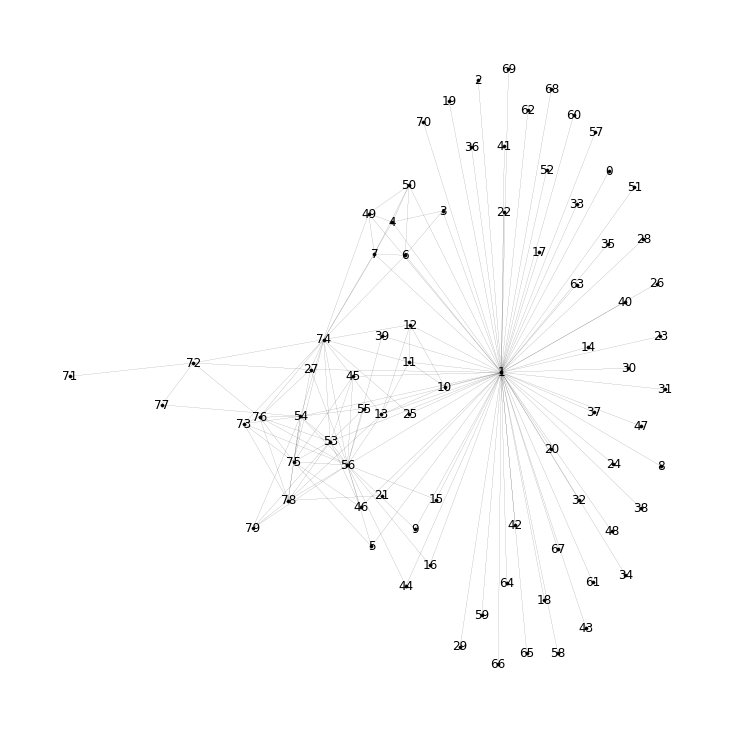

In [7]:
G = nx.from_pandas_edgelist(data, 'From', 'To')

plt.figure(figsize = (10, 10))

options = {
    "node_color": "black",
    "node_size": 10,
    "linewidths": 0.5,
    "width": 0.1,
}

nx.draw(G, with_labels = True, **options)
plt.show()

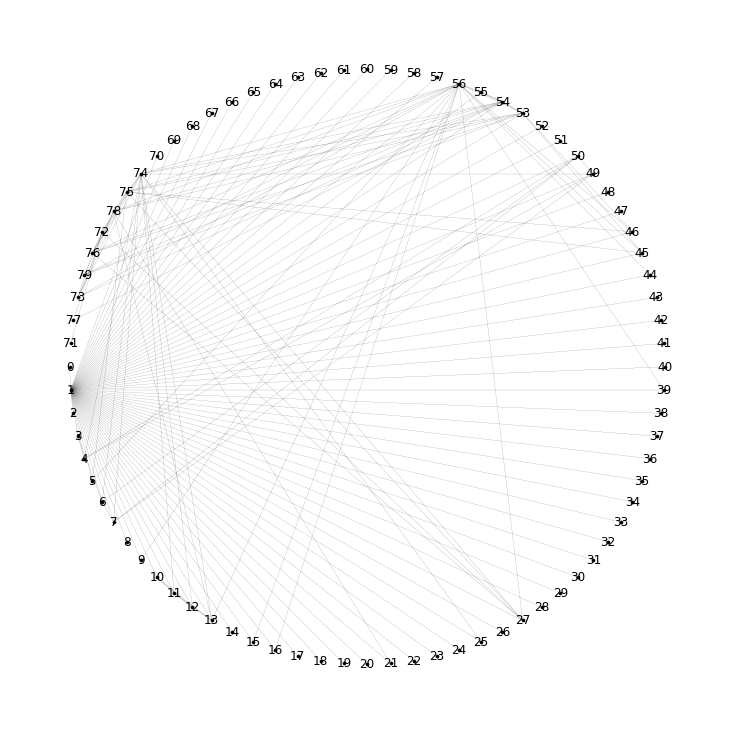

In [8]:
plt.figure(figsize = (10, 10))
nx.draw_shell(G, with_labels = True, **options)

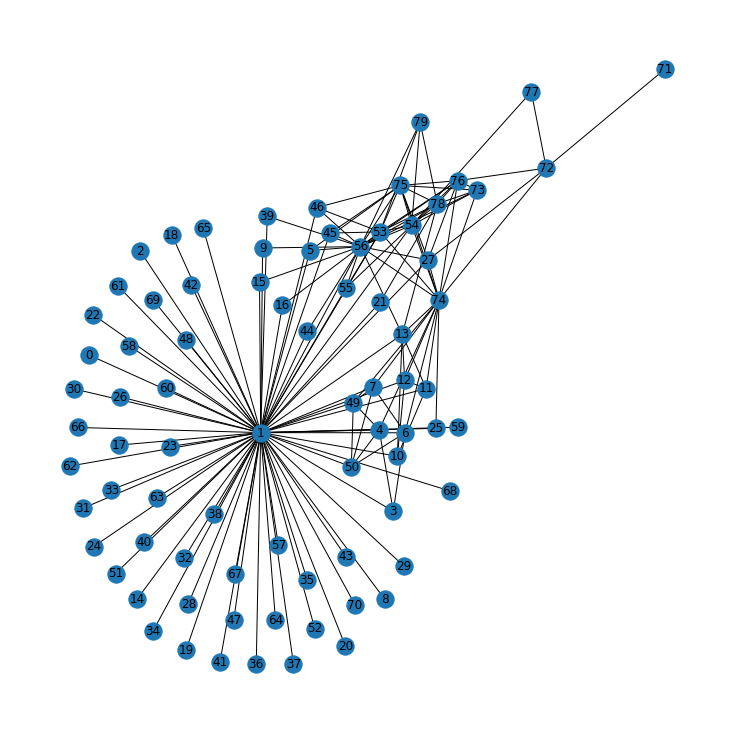

In [9]:
plt.figure(figsize = (10, 10))
nx.draw_spring(G, with_labels = True)

#### Out of the 80 nodes in the dataset, 1 appears to be the most important node as it is connected with all the other nodes. We can interpret this official, perhaps as the CEO.
#### Other important nodes are also highlighted in the visualization - 56, 54, 74, 53, 50. The circular visualization is a better visualization approach to highlight the important nodes.
#### There are internal team structures that appear from the visualization but are not very clear as to which nodes are part of which teams.

In [10]:
for i in G.degree():
    print(i)

(0, 1)
(1, 70)
(2, 1)
(3, 3)
(4, 5)
(5, 3)
(6, 5)
(7, 5)
(8, 1)
(9, 2)
(10, 4)
(11, 5)
(12, 5)
(13, 7)
(14, 1)
(15, 2)
(16, 2)
(17, 1)
(18, 1)
(19, 1)
(20, 1)
(21, 2)
(22, 1)
(23, 1)
(24, 1)
(25, 2)
(26, 1)
(27, 6)
(28, 1)
(29, 1)
(30, 1)
(31, 1)
(32, 1)
(33, 1)
(34, 1)
(35, 1)
(36, 1)
(37, 1)
(38, 1)
(39, 2)
(40, 1)
(41, 1)
(42, 1)
(43, 1)
(44, 2)
(45, 4)
(46, 4)
(47, 1)
(48, 1)
(49, 5)
(50, 5)
(51, 1)
(52, 1)
(53, 11)
(54, 11)
(55, 4)
(56, 20)
(57, 1)
(58, 1)
(59, 1)
(60, 1)
(61, 1)
(62, 1)
(63, 1)
(64, 1)
(65, 1)
(66, 1)
(67, 1)
(68, 1)
(69, 1)
(70, 1)
(74, 16)
(75, 11)
(78, 9)
(72, 5)
(76, 9)
(79, 4)
(73, 6)
(77, 2)
(71, 1)


# Measures of Centrality

In [11]:
deg_cen = nx.degree_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)

## Degree Centrality

In [12]:
temp = {}

for w in sorted(deg_cen, key = deg_cen.get, reverse = True):
    temp[w] = deg_cen[w]
    
print("Sorted Importance of nodes in terms of deg_cen for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

Sorted Importance of nodes in terms of deg_cen for Phase 72 is [1, 56, 74, 53, 54]


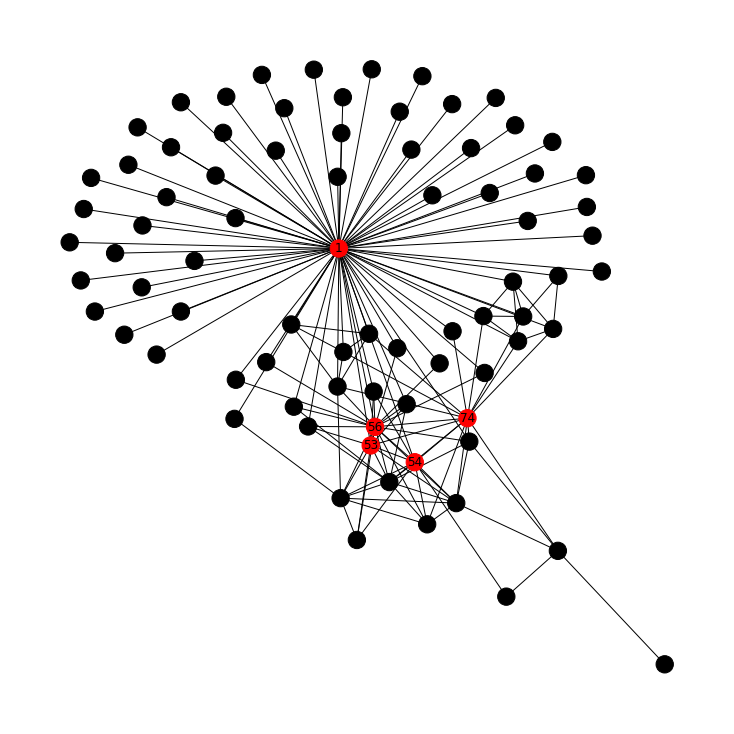

In [13]:
color = []

for node in G:
    if (node == 1 or node == 56 or node == 74 or node == 53 or node == 54):
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize = (10, 10))
nx.draw(G, node_color = color, with_labels = True)

## Eigenvector Centrality

In [14]:
temp = {}

for w in sorted(eig_cen, key = eig_cen.get, reverse = True):
    temp[w] = eig_cen[w]
    
print("Sorted Importance of nodes in terms of eig_cen for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

Sorted Importance of nodes in terms of eig_cen for Phase 72 is [1, 56, 74, 53, 54]


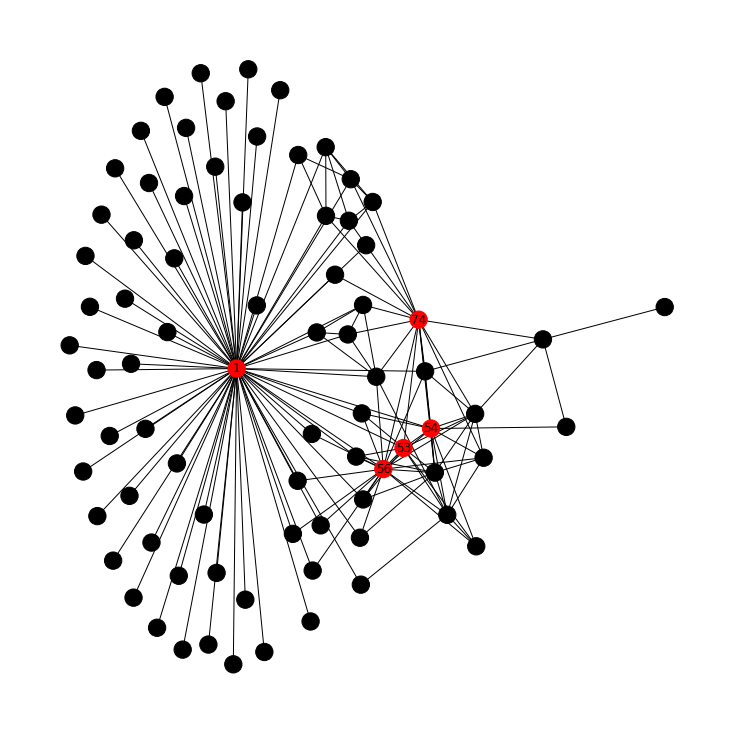

In [16]:
color = []

for node in G:
    if (node == 1 or node == 56 or node == 74 or node == 53 or node == 54):
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize = (10, 10))
nx.draw(G, node_color = color, with_labels = True)

## Betweenness Centrality

In [17]:
temp = {}

for w in sorted(bet_cen, key = bet_cen.get, reverse = True):
    temp[w] = bet_cen[w]
    
print("Sorted Importance of nodes in terms of bet_cen for Phase {} is {}".format(w + 1, list(temp.keys())[:5]))

Sorted Importance of nodes in terms of bet_cen for Phase 72 is [1, 56, 54, 27, 74]


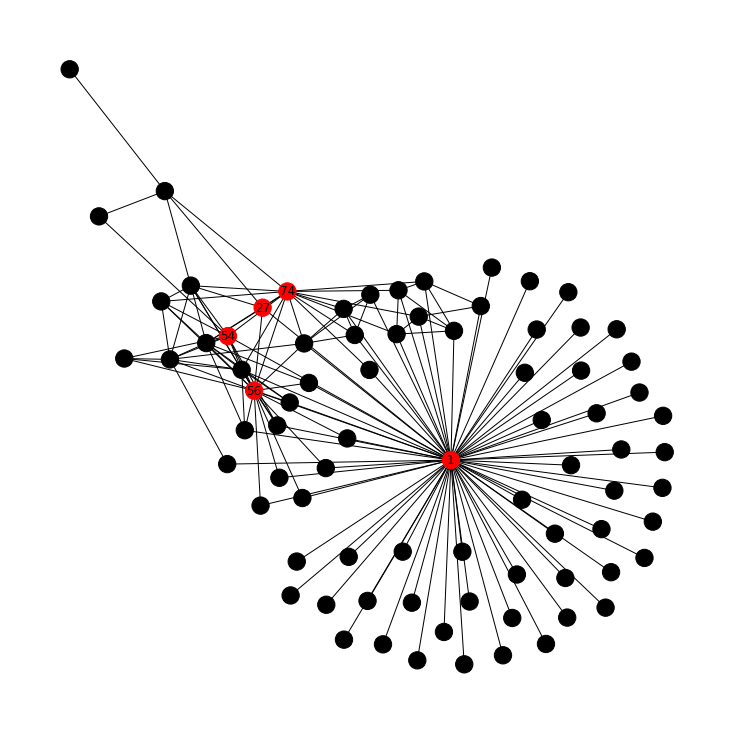

In [18]:
color = []

for node in G:
    if (node == 1 or node == 56  or node == 54 or node==27 or node==74):
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize = (10, 10))
nx.draw(G, node_color = color, with_labels = True)

## Closeness Centrality

In [19]:
temp = {}

for w in sorted(clo_cen, key = clo_cen.get, reverse = True):
    temp[w] = clo_cen[w]

print("Sorted Importance of nodes in terms of clo_cen is {}".format(list(temp.keys())[:5]))

print()

Sorted Importance of nodes in terms of clo_cen is [1, 56, 53, 54, 27]



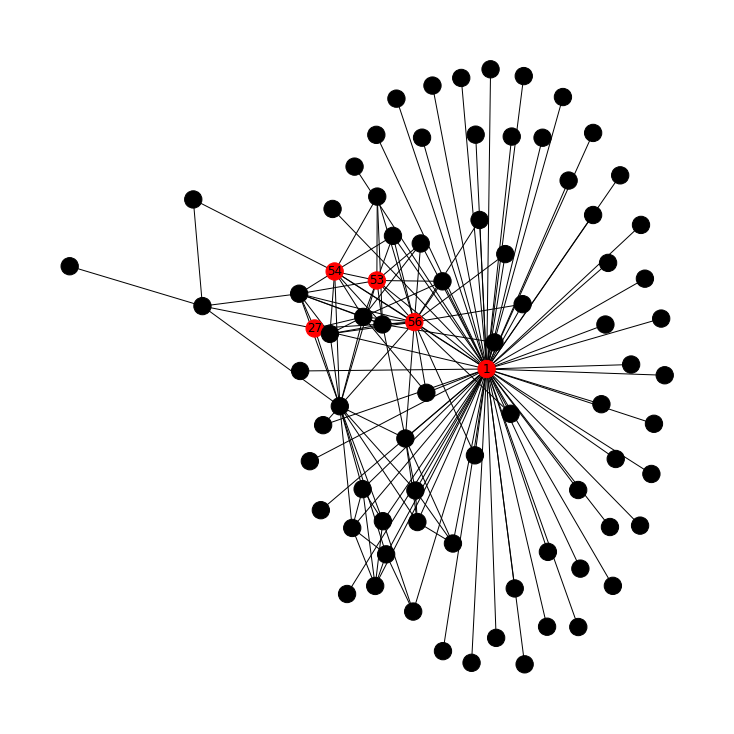

In [20]:
color = []
for node in G:
    if (node == 1 or node == 56  or node == 53 or node==54 or node==27):
        color.append('red')
    else:
        color.append('black')

plt.figure(figsize = (10, 10))
nx.draw(G, node_color = color, with_labels = True)

## Conclusions
#### We figured out the connections in the organization by visualizing the network.
#### We also found various centrality measures and figured out the important nodes for each centrality measure. The importance of these nodes can be further explained by the definitions of the centralities they correspond to.
#### We also identified the CEO node, i.e., Node 1. Nodes 56 and 54 are the other two nodes considered important by each centrality measure.
#### We could figure out that there were internal team structures, but the connections were not very clear.